In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as py
import matplotlib.pyplot as plot
import seaborn as sns
from matplotlib import rc
import matplotlib.image as mpimg

import matplotlib.mlab as mlab

In [2]:
dfScore1 = pd.read_csv('BrgyScore1.csv', low_memory=False);
dfScore2 = pd.read_csv('BrgyScore2.csv', low_memory=False);
dfScore3A = pd.read_csv('BrgyScore3A.csv', low_memory=False);
dfScore3B = pd.read_csv('BrgyScore3B.csv', low_memory=False);
dfScore4 = pd.read_csv('BrgyScore4.csv', low_memory=False);
dfScore5 = pd.read_csv('BrgyScore5.csv', low_memory=False);

In [3]:
dfMain = dfScore1
# Initiates our main dataframe for the final scoring by copying dfScore1

dfMain = pd.merge(dfMain, dfScore2, on="brgy")
dfMain = pd.merge(dfMain, dfScore3A, on="brgy")
dfMain = pd.merge(dfMain, dfScore3B, on="brgy")
dfMain = pd.merge(dfMain, dfScore4, on="brgy")
dfMain = pd.merge(dfMain, dfScore5, on="brgy")


dfMain.rename(columns={'score':'literacy_score',
                       'finalScore':'home_score',
                       'theScore':'income_score'}, 
              inplace=True)
# Renames the 'score' column into 'literacy_score' to better identify it

dfMain

,brgy,literacy_score,asset_score,water_score,food_score,home_score,income_score
0,1,0.566667,0.367347,1.000000,1.000000,0.892857,1.000000
1,2,0.536019,0.254915,0.036697,1.000000,0.996560,0.995097
2,3,0.416667,0.326531,0.285714,1.000000,0.976190,1.000000
3,4,0.349750,0.331754,0.440758,1.000000,0.992891,0.994135
4,5,0.509877,0.279907,0.089431,1.000000,0.998645,0.979268
5,6,0.487374,0.305394,0.173469,1.000000,0.999150,0.997130
6,7,0.447693,0.253821,0.274419,1.000000,0.872093,0.997384
7,8,0.419841,0.266129,0.185484,1.000000,0.883065,0.982233
8,9,0.775731,0.202116,0.251852,1.000000,0.996914,1.000000
9,10,0.501974,0.274510,0.124183,1.000000,0.868736,0.992708


In [4]:
dfMain['total_score'] = (dfMain['literacy_score'] + dfMain['asset_score'] + dfMain['food_score'] + dfMain['water_score'] + dfMain['home_score'] + dfMain['income_score']) / 6
# Computed for the average of all the scores under the assumption that these have the same weight.

dfMain

,brgy,literacy_score,asset_score,water_score,food_score,home_score,income_score,total_score
0,1,0.566667,0.367347,1.000000,1.000000,0.892857,1.000000,0.804478
1,2,0.536019,0.254915,0.036697,1.000000,0.996560,0.995097,0.636548
2,3,0.416667,0.326531,0.285714,1.000000,0.976190,1.000000,0.667517
3,4,0.349750,0.331754,0.440758,1.000000,0.992891,0.994135,0.684881
4,5,0.509877,0.279907,0.089431,1.000000,0.998645,0.979268,0.642855
5,6,0.487374,0.305394,0.173469,1.000000,0.999150,0.997130,0.660419
6,7,0.447693,0.253821,0.274419,1.000000,0.872093,0.997384,0.640902
7,8,0.419841,0.266129,0.185484,1.000000,0.883065,0.982233,0.622792
8,9,0.775731,0.202116,0.251852,1.000000,0.996914,1.000000,0.704435
9,10,0.501974,0.274510,0.124183,1.000000,0.868736,0.992708,0.627019


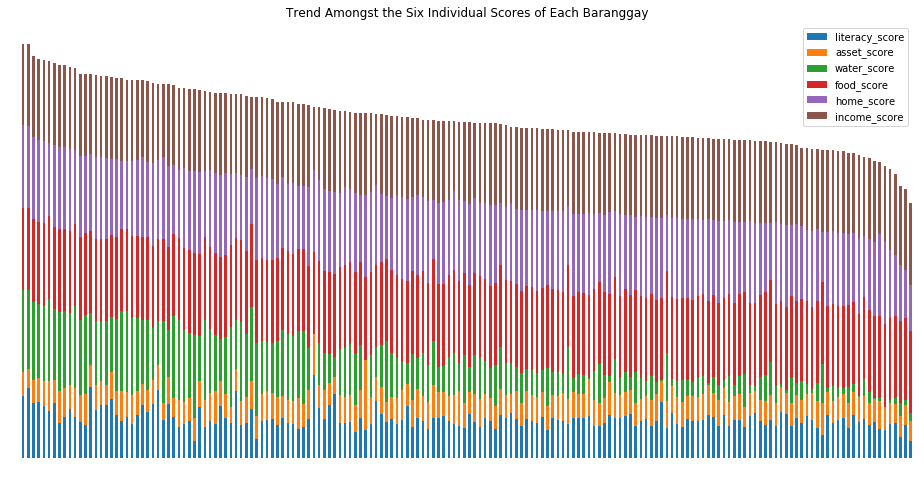

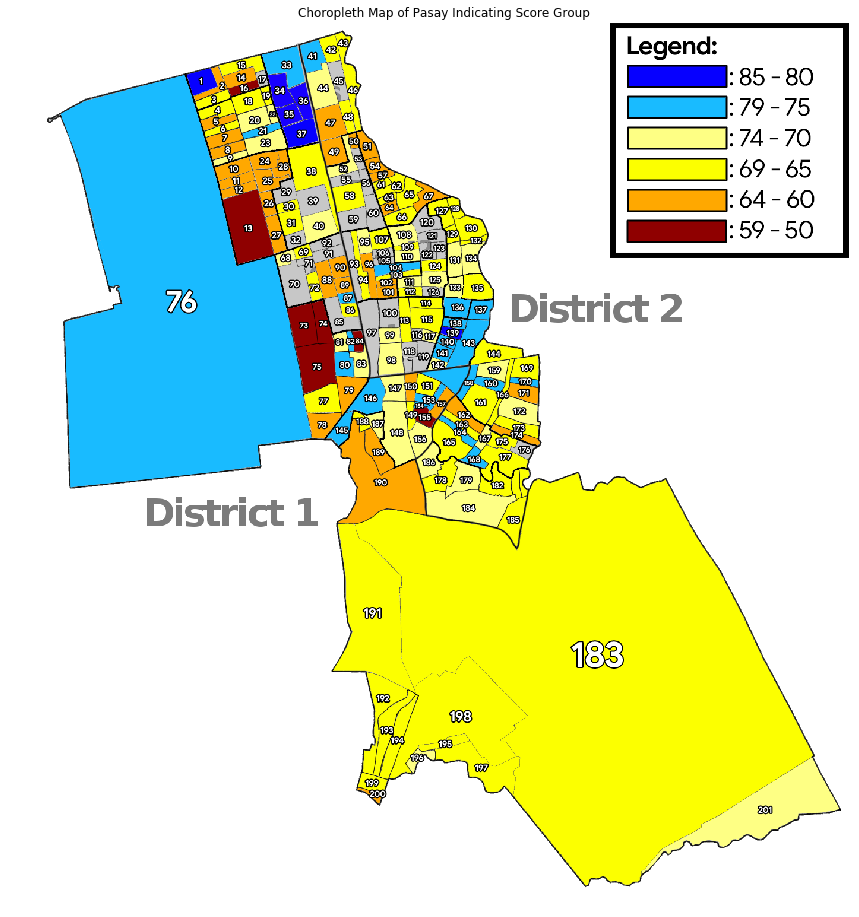

In [9]:
#arrayBrgyScores = dfMain.groupby('brgy')['total_score'].mean()
# Groups the families by brgy and takes the average of their family literacy.
# Output is an array, not a dataframe.

#ax = arrayBrgyScores.sort_values(ascending=False).plot(kind='barh', figsize=(10,40), color='#008080',  width=0.8, stacked=True)
#ax.invert_yaxis()
#ax.set_ylabel('Baranggay #')
#ax.set_xlabel('Score')    
#ax.xaxis.set_label_position('top') 
#for p in ax.patches:
    #ax.annotate(str(round(p.get_width(),3)), (p.get_width() * 1.005, p.get_y() + 0.5))
#plot.title('Calamity Preparedness Score of Each Baranggay', y=1.02)
#plot.legend()
#plot.show()
# Bar graph of all the college literacy rate per family of each baranggay

dfSorted = dfMain.sort_values(by='total_score',ascending=False)
dfSorted.loc[:,['literacy_score','asset_score', 'water_score','food_score','home_score','income_score']].plot.bar(stacked=True, figsize=(16,8))
plot.axis('off')
plot.title('Trend Amongst the Six Individual Scores of Each Baranggay')
plot.show()

img=mpimg.imread('Final.png')
plot.figure(figsize=(16,16))
imgplot = plot.imshow(img)
plot.axis('off')
plot.title('Choropleth Map of Pasay Indicating Score Group')
plot.show()

# Calamity Preparedness Score


## Preface

Due to the study having too many areas of interest that have to be analyzed and scored, specifically: the Competency, Tools and Connectivity, Food and Water Security, Home Construction, and Income of pasay residents in each baranggay, we decided to split their corresponding step-by-step methodology, graph explanation, and assumptions into five (5) different Jupyter notebooks.

    Notebooks Directory:
    1. DATASCI Project Score 1 -> Calamity Preparedness Score 1: College Literacy
    2. DATASCI Project Score 2 -> Calamity Preparedness Score 2: Calamity-Useful Asset Ownership
    3. DATASCI Project Score 3 -> Calamity Preparedness Score 3A: Water Accessibility
                               -> Calamity Preparedness Score 3B: Food Security
    4. DATASCI Project Score 4 -> Calamity Preparedness Score 4: Home Material Quality
    5. DATASCI Project Score 5 -> Calamity Preparedness Score 5: Income Score
    
For questions about how we came up with the score of a specific area such as the College Literacy, please refer to the corresponding Jupyter notebook.

## Assumption 
1. During the project proposal, the panel recommended us to come up with a scoring scheme that would combine the grades of the areas of interest in our study: the Competency, Tools and Connectivity, Food and Water Security, Home Construction, and Income of the residents in Pasay broken down into it's individual baranggays. We decicded to consider all these different factors as equal in weight since there has been no study that has ranked these aspects of disaster preparedness.

2. The different criteria and formulas for grading these individual areas are discussed in their individual Jupyter notebooks. In this notebook, we'll discuss how we combined the six scores. Since we decided that they all have equal weights, we just computed for the average of these values.

        Overall Score = (Score 1 + Score 2 + Score 3A + Score 3B + Score 4 + Score 5) / 2


## Explanation
1. Looking at the CHOROPLETH MAP, onlys six baranggays have went above 0.8. These highest scoring baranggays (in blue) are brgys 1, 34, 35, 36, 37, and 139. Four of these high-scoring baranggays (34, 35, 36, and 37) are geographically close to each other which might mean that this is where families more well-off than the rest of Pasay live. Looking at this Google map of the area: https://goo.gl/maps/8BQeA9acYvK2, it can be seen that these baranggays are filled with high rise buildings and villa like homes which futher supports the point.

2. The 7 lowest scoring baranggays (in red): 13, 16, 73, 74, 75, 84, and 155 all fall below 0.6. Three of these low-scoring baranggays - 73, 74, and 75 - are clustered next to each other. Going to this link: https://goo.gl/maps/sSkyfjDpMJ72, it can be seen that the area has a regular neighborhood as opposed to the high-rise buildings we've seen earlier. 

3. The gray areas in the map are baranggays that doesn't have any data in the dataset that we can evaluate. They were not scored.

4. The CHOROPLETH Map overall presents us information we wont see from other graphs. Most highest scoring areas in blue and light seem to be huddled in patches in the north side of Pasay nearer to the rest of Metro Manila. This indicates that this area is highly urbanized, however it is also worthy of noting that the lowest scoring areas in orange and red seems to be in the middle of this urban area as well which might indicate urban inequalities when it comes to access to water, food, education, income, and assets. In fact this already a phenomena observed by many studies such as a study by Satterthwaite & Mitlin (2010) of World Health Organization.

5. The BAR GRAPH illustrates the correlation of the scores of the baranggays in each aspect. The scores seem to go up or down at the same time. Looking at the left-most side of this bar graph, we can see that the top baranggay has high scores for all aspects, indicating well-rounded families in the baranggay who has access to water, food, education, assets, decent home, and income. However, as we traverse from the left-most side to the right-most side of the graph, we can see that the score for each area seems to all go down at the same, albeit at different rates with the water accessibility score being the biggest differentiator. This could point to the fact that access to these resources relies on the wealth of the family. Having access to education almost always entails having access to water, food, and assets such as cars and television, and vice-versa.

## Methodology
1. Load all the saved CSV files from the other 5 Jupyter notebooks containing their respective score values for each baranggay.

2. Combined all the resulting dataframes into one dfMain dataframe through the use of JOINS.

3. Remapped some of the column names to have consistent and descriptive column labelling.

4. Added all the six scores and then divided by 6. The result was put in a new column called 'total_score'.

5. Fed the data into a bar graph showing the trend and saved CSV file of dfMain in order to manually create the CHOROPLETH map we used. There was no polygonal map coordinates for each baranggay to make this map using python APIs, so we made it ourselves using a image map of Pasay and it's baranggays we found online.

## References
http://regardssurlaterre.com/en/inequalities-within-urban-half-world

In [6]:
dfMain.to_csv('FinalScore.csv', encoding='utf-8')
# The computed means for each baranggay's family college literates  rate is saved onto a CSV file for future use.